In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats
import sklearn
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import os

In [2]:
crashfp ='/Users/jacksonpeoples/Desktop/Springboard/CapstoneTwo/Data/crash_cleaned.csv'
hourlyfp ='/Users/jacksonpeoples/Desktop/Springboard/CapstoneTwo/Data/hourly_crash_cleaned.csv'
crash = pd.read_csv(crashfp)
hourly = pd.read_csv(hourlyfp)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93503 entries, 0 to 93502
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   utc_unix    93503 non-null  int64  
 1   dt_iso      93503 non-null  object 
 2   timezone    93503 non-null  int64  
 3   city_name   93503 non-null  object 
 4   lat         93503 non-null  float64
 5   lon         93503 non-null  float64
 6   temp        93503 non-null  float64
 7   feels_like  93503 non-null  float64
 8   temp_min    93503 non-null  float64
 9   temp_max    93503 non-null  float64
 10  pressure    93503 non-null  int64  
 11  humidity    93503 non-null  int64  
 12  wind_speed  93503 non-null  float64
 13  wind_deg    93503 non-null  int64  
 14  rain_1h     93503 non-null  float64
 15  rain_3h     93503 non-null  float64
 16  snow_1h     93503 non-null  float64
 17  snow_3h     93503 non-null  float64
 18  clouds_all  93503 non-null  int64  
 19  count       93503 non-nul

In [4]:
hourly['LocalTime'] = pd.to_datetime(hourly['LocalTime'])

In [5]:
hourly['LocalTime'].value_counts().head(10).index

DatetimeIndex(['2012-11-04 01:00:00', '2013-11-03 01:00:00',
               '2014-11-02 01:00:00', '2010-11-07 01:00:00',
               '2017-11-05 01:00:00', '2015-11-01 01:00:00',
               '2019-11-03 01:00:00', '2011-11-06 01:00:00',
               '2016-11-06 01:00:00', '2018-11-04 01:00:00'],
              dtype='datetime64[ns]', freq=None)

In [6]:
double_dates = list(hourly['LocalTime'].value_counts().head(10).index)

In [7]:
filt=(hourly['LocalTime'].isin(double_dates))&(hourly['count']==0)

In [8]:
hourly_clean = hourly[~filt]

In [9]:
hourly = hourly.set_index('LocalTime')

In [10]:
hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93503 entries, 2010-01-01 00:00:00 to 2020-08-31 23:00:00
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   utc_unix    93503 non-null  int64  
 1   dt_iso      93503 non-null  object 
 2   timezone    93503 non-null  int64  
 3   city_name   93503 non-null  object 
 4   lat         93503 non-null  float64
 5   lon         93503 non-null  float64
 6   temp        93503 non-null  float64
 7   feels_like  93503 non-null  float64
 8   temp_min    93503 non-null  float64
 9   temp_max    93503 non-null  float64
 10  pressure    93503 non-null  int64  
 11  humidity    93503 non-null  int64  
 12  wind_speed  93503 non-null  float64
 13  wind_deg    93503 non-null  int64  
 14  rain_1h     93503 non-null  float64
 15  rain_3h     93503 non-null  float64
 16  snow_1h     93503 non-null  float64
 17  snow_3h     93503 non-null  float64
 18  clouds_all  93503 non-null  int

In [11]:
hourly.head()

,utc_unix,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,count,Weekday
LocalTime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,1262325600,2010-01-01 06:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,42.49,35.33,41.0,44.49,...,72,6.93,330,0.0,0.0,0.0,0.0,90,1.0,Friday
2010-01-01 01:00:00,1262329200,2010-01-01 07:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,42.53,36.01,41.0,44.75,...,72,5.82,340,0.0,0.0,0.0,0.0,90,4.0,Friday
2010-01-01 02:00:00,1262332800,2010-01-01 08:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,40.69,31.86,39.2,43.77,...,69,9.17,320,0.0,0.0,0.0,0.0,1,6.0,Friday
2010-01-01 03:00:00,1262336400,2010-01-01 09:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,38.52,31.28,37.4,40.90,...,69,5.82,330,0.0,0.0,0.0,0.0,1,1.0,Friday
2010-01-01 04:00:00,1262340000,2010-01-01 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,36.30,27.30,35.6,37.21,...,75,8.93,350,0.0,0.0,0.0,0.0,1,3.0,Friday


In [12]:
hourly[hourly.index.strftime('%m-%d')=='01-01']

,utc_unix,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,count,Weekday
LocalTime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,1262325600,2010-01-01 06:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,42.49,35.33,41.00,44.49,...,72,6.93,330,0.0,0.0,0.0,0.0,90,1.0,Friday
2010-01-01 01:00:00,1262329200,2010-01-01 07:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,42.53,36.01,41.00,44.75,...,72,5.82,340,0.0,0.0,0.0,0.0,90,4.0,Friday
2010-01-01 02:00:00,1262332800,2010-01-01 08:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,40.69,31.86,39.20,43.77,...,69,9.17,320,0.0,0.0,0.0,0.0,1,6.0,Friday
2010-01-01 03:00:00,1262336400,2010-01-01 09:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,38.52,31.28,37.40,40.90,...,69,5.82,330,0.0,0.0,0.0,0.0,1,1.0,Friday
2010-01-01 04:00:00,1262340000,2010-01-01 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,36.30,27.30,35.60,37.21,...,75,8.93,350,0.0,0.0,0.0,0.0,1,3.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 19:00:00,1577926800,2020-01-02 01:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,53.67,48.99,52.00,55.40,...,62,4.70,290,0.0,0.0,0.0,0.0,90,1.0,Wednesday
2020-01-01 20:00:00,1577930400,2020-01-02 02:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,53.53,48.88,52.00,55.40,...,66,5.17,170,0.0,0.0,0.0,0.0,90,0.0,Wednesday
2020-01-01 21:00:00,1577934000,2020-01-02 03:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,53.42,46.92,52.00,55.40,...,71,9.17,150,0.0,0.0,0.0,0.0,90,0.0,Wednesday


In [13]:
z = hourly.index[3]

In [14]:
z.strftime('%m%d%H')

'010103'

In [15]:
np.mean(hourly['count'][hourly.index.strftime('%m%d%H')==z.strftime('%m%d%H')])

3.6363636363636362

In [16]:
hourly['OneWeek'] = hourly['count'].shift(7*24)
hourly['TwoWeek'] = hourly['count'].shift(7*24*2)
hourly['ThreeWeek'] = hourly['count'].shift(7*24*3)

In [17]:
hourly[(hourly.index.weekday==4)&(hourly.index.hour==4)].head(50)

,utc_unix,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,count,Weekday,OneWeek,TwoWeek,ThreeWeek
LocalTime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 04:00:00,1262340000,2010-01-01 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,36.30,27.30,35.60,37.21,...,0.00,0.00,0.0,0.0,1,3.0,Friday,NaN,NaN,NaN
2010-01-08 04:00:00,1262944800,2010-01-08 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,24.67,13.41,23.87,24.98,...,0.00,0.00,0.0,0.0,1,1.0,Friday,3.0,NaN,NaN
2010-01-15 04:00:00,1263549600,2010-01-15 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,52.52,50.04,51.52,53.06,...,2.21,0.00,0.0,0.0,90,0.0,Friday,1.0,3.0,NaN
2010-01-22 04:00:00,1264154400,2010-01-22 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,48.76,42.91,46.23,50.00,...,0.00,0.00,0.0,0.0,1,0.0,Friday,0.0,1.0,3.0
2010-01-29 04:00:00,1264759200,2010-01-29 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,48.43,40.44,46.40,53.61,...,0.50,0.00,0.0,0.0,90,1.0,Friday,0.0,0.0,1.0
2010-02-05 04:00:00,1265364000,2010-02-05 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,46.45,43.23,45.58,46.94,...,0.00,0.00,0.0,0.0,90,0.0,Friday,1.0,0.0,0.0
2010-02-12 04:00:00,1265968800,2010-02-12 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,35.71,28.85,35.35,36.08,...,0.00,0.00,0.0,0.0,40,0.0,Friday,0.0,1.0,0.0
2010-02-19 04:00:00,1266573600,2010-02-19 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,50.00,44.06,49.61,50.52,...,0.00,0.00,0.0,0.0,90,0.0,Friday,0.0,0.0,1.0
2010-02-26 04:00:00,1267178400,2010-02-26 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,46.80,43.11,46.40,47.61,...,0.00,0.00,0.0,0.0,75,0.0,Friday,0.0,0.0,0.0


In [18]:
hourly['OneWeek'] = hourly['OneWeek'].fillna(hourly['count'])

In [19]:
hourly['TwoWeek'] = hourly.apply(lambda row: (row['OneWeek'] + row['count'])/2 if 
                                 np.isnan(row['TwoWeek']) else row['TwoWeek'], axis=1)

In [20]:
hourly['ThreeWeek'] = hourly.apply(lambda row: (row['OneWeek'] + row['count'] + row['TwoWeek'])/3 if 
                                 np.isnan(row['ThreeWeek']) else row['ThreeWeek'], axis=1)

In [21]:
hourly[(hourly.index.weekday==4)&(hourly.index.hour==4)].head(50)

,utc_unix,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,count,Weekday,OneWeek,TwoWeek,ThreeWeek
LocalTime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 04:00:00,1262340000,2010-01-01 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,36.30,27.30,35.60,37.21,...,0.00,0.00,0.0,0.0,1,3.0,Friday,3.0,3.0,3.000000
2010-01-08 04:00:00,1262944800,2010-01-08 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,24.67,13.41,23.87,24.98,...,0.00,0.00,0.0,0.0,1,1.0,Friday,3.0,2.0,2.000000
2010-01-15 04:00:00,1263549600,2010-01-15 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,52.52,50.04,51.52,53.06,...,2.21,0.00,0.0,0.0,90,0.0,Friday,1.0,3.0,1.333333
2010-01-22 04:00:00,1264154400,2010-01-22 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,48.76,42.91,46.23,50.00,...,0.00,0.00,0.0,0.0,1,0.0,Friday,0.0,1.0,3.000000
2010-01-29 04:00:00,1264759200,2010-01-29 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,48.43,40.44,46.40,53.61,...,0.50,0.00,0.0,0.0,90,1.0,Friday,0.0,0.0,1.000000
2010-02-05 04:00:00,1265364000,2010-02-05 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,46.45,43.23,45.58,46.94,...,0.00,0.00,0.0,0.0,90,0.0,Friday,1.0,0.0,0.000000
2010-02-12 04:00:00,1265968800,2010-02-12 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,35.71,28.85,35.35,36.08,...,0.00,0.00,0.0,0.0,40,0.0,Friday,0.0,1.0,0.000000
2010-02-19 04:00:00,1266573600,2010-02-19 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,50.00,44.06,49.61,50.52,...,0.00,0.00,0.0,0.0,90,0.0,Friday,0.0,0.0,1.000000
2010-02-26 04:00:00,1267178400,2010-02-26 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,46.80,43.11,46.40,47.61,...,0.00,0.00,0.0,0.0,75,0.0,Friday,0.0,0.0,0.000000


In [22]:
def datehour(row):
    dh = row.index.strftime('%m%d%H')
    return np.mean(hourly['count'][hourly.index.strftime('%m%d%H')==dh])

In [23]:
np.mean(hourly['count'][hourly.index.strftime('%m%d%H')==z.strftime('%m%d%H')])

3.6363636363636362

In [24]:
hourly['dhid'] = hourly.apply(lambda row: row.name.strftime('%m%d%H'), axis=1)

In [25]:
avg_series = hourly.groupby('dhid')['count'].mean()

In [26]:
index = pd.RangeIndex(0, len(avg_series))

In [27]:
avg_df = pd.DataFrame(avg_series, columns=['dhid','count'], index=index)

In [28]:
hourly_new = hourly.reset_index().merge(avg_series, on='dhid', how='left').set_index('LocalTime')

<AxesSubplot:xlabel='count_x', ylabel='count_y'>

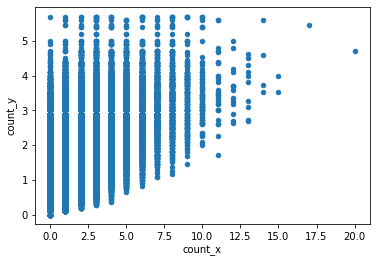

In [29]:
hourly_new.plot.scatter('count_x','count_y')

In [30]:
hourly_new['RollingAvg'] = hourly_new.apply(lambda row: (row['OneWeek'] + row['TwoWeek'] + row['ThreeWeek'])/3, axis=1)

In [31]:
hourly_new.head(50)

,utc_unix,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,snow_3h,clouds_all,count_x,Weekday,OneWeek,TwoWeek,ThreeWeek,dhid,count_y,RollingAvg
LocalTime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,1262325600,2010-01-01 06:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,42.49,35.33,41.00,44.49,...,0.0,90,1.0,Friday,1.0,1.0,1.0,010100,2.090909,1.0
2010-01-01 01:00:00,1262329200,2010-01-01 07:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,42.53,36.01,41.00,44.75,...,0.0,90,4.0,Friday,4.0,4.0,4.0,010101,2.818182,4.0
2010-01-01 02:00:00,1262332800,2010-01-01 08:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,40.69,31.86,39.20,43.77,...,0.0,1,6.0,Friday,6.0,6.0,6.0,010102,4.363636,6.0
2010-01-01 03:00:00,1262336400,2010-01-01 09:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,38.52,31.28,37.40,40.90,...,0.0,1,1.0,Friday,1.0,1.0,1.0,010103,3.636364,1.0
2010-01-01 04:00:00,1262340000,2010-01-01 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,36.30,27.30,35.60,37.21,...,0.0,1,3.0,Friday,3.0,3.0,3.0,010104,1.909091,3.0
2010-01-01 05:00:00,1262343600,2010-01-01 11:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,36.32,28.45,35.60,37.04,...,0.0,1,2.0,Friday,2.0,2.0,2.0,010105,1.454545,2.0
2010-01-01 06:00:00,1262347200,2010-01-01 12:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,35.89,26.83,35.29,36.36,...,0.0,1,0.0,Friday,0.0,0.0,0.0,010106,0.636364,0.0
2010-01-01 07:00:00,1262350800,2010-01-01 13:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,35.26,25.36,33.80,35.96,...,0.0,1,0.0,Friday,0.0,0.0,0.0,010107,1.000000,0.0
2010-01-01 08:00:00,1262354400,2010-01-01 14:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,35.37,26.87,35.06,36.09,...,0.0,1,0.0,Friday,0.0,0.0,0.0,010108,0.454545,0.0


<AxesSubplot:xlabel='count_x', ylabel='RollingAvg'>

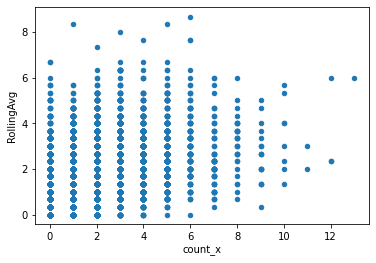

In [32]:
hourly_new['2015'].plot.scatter('count_x','RollingAvg')

In [33]:
hourly_new.tail(50)

,utc_unix,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,snow_3h,clouds_all,count_x,Weekday,OneWeek,TwoWeek,ThreeWeek,dhid,count_y,RollingAvg
LocalTime,,,,,,,,,,,,,,,,,,,,,
2020-08-29 22:00:00,1598756400,2020-08-30 03:00:00 +0000 UTC,-18000,Austin,30.267153,-97.743061,89.17,89.44,86.00,91.99,...,0.0,1,2.0,Saturday,3.0,2.0,4.0,082922,1.363636,3.000000
2020-08-29 23:00:00,1598760000,2020-08-30 04:00:00 +0000 UTC,-18000,Austin,30.267153,-97.743061,87.19,89.73,84.99,89.01,...,0.0,20,3.0,Saturday,0.0,1.0,1.0,082923,0.818182,0.666667
2020-08-30 00:00:00,1598763600,2020-08-30 05:00:00 +0000 UTC,-18000,Austin,30.267153,-97.743061,85.14,86.88,82.99,86.00,...,0.0,1,2.0,Sunday,2.0,0.0,1.0,083000,0.818182,1.000000
2020-08-30 01:00:00,1598767200,2020-08-30 06:00:00 +0000 UTC,-18000,Austin,30.267153,-97.743061,83.28,88.00,81.71,84.99,...,0.0,1,1.0,Sunday,1.0,1.0,2.0,083001,0.454545,1.333333
2020-08-30 02:00:00,1598770800,2020-08-30 07:00:00 +0000 UTC,-18000,Austin,30.267153,-97.743061,81.64,84.97,80.01,83.15,...,0.0,1,0.0,Sunday,0.0,0.0,1.0,083002,0.909091,0.333333
2020-08-30 03:00:00,1598774400,2020-08-30 08:00:00 +0000 UTC,-18000,Austin,30.267153,-97.743061,80.33,86.59,78.80,82.00,...,0.0,1,3.0,Sunday,0.0,1.0,1.0,083003,0.636364,0.666667
2020-08-30 04:00:00,1598778000,2020-08-30 09:00:00 +0000 UTC,-18000,Austin,30.267153,-97.743061,79.48,84.88,78.01,81.00,...,0.0,1,2.0,Sunday,0.0,0.0,1.0,083004,0.636364,0.333333
2020-08-30 05:00:00,1598781600,2020-08-30 10:00:00 +0000 UTC,-18000,Austin,30.267153,-97.743061,79.03,85.59,77.00,81.00,...,0.0,75,2.0,Sunday,2.0,0.0,1.0,083005,0.727273,1.000000
2020-08-30 06:00:00,1598785200,2020-08-30 11:00:00 +0000 UTC,-18000,Austin,30.267153,-97.743061,78.39,86.58,77.00,80.01,...,0.0,20,1.0,Sunday,0.0,1.0,0.0,083006,1.272727,0.333333


In [34]:
hourly_new['is_raining'] = np.where(hourly_new['rain_1h'] > 0, 1, 0)

<AxesSubplot:xlabel='count_x', ylabel='count_y'>

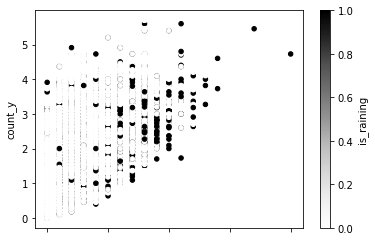

In [35]:
hourly_new.plot.scatter('count_x','count_y',c='is_raining')

In [36]:
hourly_new['is_pandemic'] = np.where(hourly_new.index.strftime('%m%d%Y') > '03152020', 1, 0)

In [37]:
hourly_new[hourly_new['is_pandemic']==1]

,utc_unix,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,count_x,Weekday,OneWeek,TwoWeek,ThreeWeek,dhid,count_y,RollingAvg,is_raining,is_pandemic
LocalTime,,,,,,,,,,,,,,,,,,,,,
2010-03-16 00:00:00,1268715600,2010-03-16 05:00:00 +0000 UTC,-18000,Austin,30.267153,-97.743061,55.94,52.00,55.04,58.29,...,0.0,Tuesday,1.0,0.0,1.0,031600,1.090909,0.666667,1,1
2010-03-16 01:00:00,1268719200,2010-03-16 06:00:00 +0000 UTC,-18000,Austin,30.267153,-97.743061,54.66,48.69,53.60,58.49,...,2.0,Tuesday,0.0,0.0,0.0,031601,0.636364,0.000000,1,1
2010-03-16 02:00:00,1268722800,2010-03-16 07:00:00 +0000 UTC,-18000,Austin,30.267153,-97.743061,54.36,52.12,53.60,57.49,...,0.0,Tuesday,1.0,0.0,1.0,031602,1.909091,0.666667,1,1
2010-03-16 03:00:00,1268726400,2010-03-16 08:00:00 +0000 UTC,-18000,Austin,30.267153,-97.743061,53.92,50.31,53.06,56.27,...,0.0,Tuesday,0.0,1.0,2.0,031603,0.909091,1.000000,0,1
2010-03-16 04:00:00,1268730000,2010-03-16 09:00:00 +0000 UTC,-18000,Austin,30.267153,-97.743061,53.98,51.64,53.06,56.05,...,0.0,Tuesday,1.0,0.0,0.0,031604,1.090909,0.333333,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31 19:00:00,1598918400,2020-09-01 00:00:00 +0000 UTC,-18000,Austin,30.267153,-97.743061,94.98,94.60,92.24,97.00,...,1.0,Monday,0.0,0.0,3.0,083119,2.000000,1.000000,1,1
2020-08-31 20:00:00,1598922000,2020-09-01 01:00:00 +0000 UTC,-18000,Austin,30.267153,-97.743061,91.92,94.39,90.00,93.99,...,1.0,Monday,0.0,0.0,1.0,083120,1.545455,0.333333,1,1
2020-08-31 21:00:00,1598925600,2020-09-01 02:00:00 +0000 UTC,-18000,Austin,30.267153,-97.743061,89.51,93.00,87.01,91.40,...,0.0,Monday,0.0,2.0,0.0,083121,1.727273,0.666667,0,1


In [38]:
hourly_new[hourly['dhid']=='031600']['clouds_all']

LocalTime
2010-03-16    90
2011-03-16     1
2012-03-16    89
2013-03-16     1
2014-03-16     1
2015-03-16    20
2016-03-16     1
2017-03-16    75
2018-03-16    90
2019-03-16     1
2020-03-16    75
Name: clouds_all, dtype: int64

In [39]:
hourly_new.columns

Index(['utc_unix', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
       'clouds_all', 'count_x', 'Weekday', 'OneWeek', 'TwoWeek', 'ThreeWeek',
       'dhid', 'count_y', 'RollingAvg', 'is_raining', 'is_pandemic'],
      dtype='object')

In [40]:
dropcols = ['utc_unix', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon','feels_like', 'temp_min', 
            'temp_max', 'pressure', 'humidity', 'wind_deg', 'rain_3h', 'snow_3h']
hourly_new.drop(dropcols, axis=1,inplace=True)

In [41]:
hourly_new['is_snowing'] = np.where(hourly_new['snow_1h'] > 0, 1, 0)

In [42]:
hourly_new['count_x'][hourly_new['is_snowing']==1].mean(),hourly_new['count_x'][hourly_new['is_snowing']==0].mean()

(2.12, 1.7303699105193304)

In [43]:
std=np.std(hourly_new['count_x'])
mean=np.mean(hourly_new['count_x'])
std, mean

(1.6788893360272716, 1.730682437996642)

In [44]:
hourly_new[hourly_new['count_x'] > mean+(std*3)]

,temp,wind_speed,rain_1h,snow_1h,clouds_all,count_x,Weekday,OneWeek,TwoWeek,ThreeWeek,dhid,count_y,RollingAvg,is_raining,is_pandemic,is_snowing
LocalTime,,,,,,,,,,,,,,,,
2010-01-13 18:00:00,54.41,7.20,0.00,0.0,90,7.0,Wednesday,1.0,4.0,4.000000,011318,4.090909,3.000000,0,0,0
2010-01-15 19:00:00,47.16,14.99,3.30,0.0,90,8.0,Friday,0.0,0.0,2.666667,011519,2.909091,0.888889,1,0,0
2010-01-21 17:00:00,73.74,3.36,0.00,0.0,1,7.0,Thursday,1.0,4.0,4.000000,012117,3.000000,3.000000,0,0,0
2010-01-23 16:00:00,62.60,12.75,0.00,0.0,40,7.0,Saturday,1.0,0.0,1.000000,012316,4.000000,0.666667,0,0,0
2010-01-29 16:00:00,40.84,10.29,0.00,0.0,90,7.0,Friday,2.0,2.0,0.000000,012916,3.909091,1.333333,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-25 15:00:00,86.76,6.93,0.25,0.0,1,9.0,Saturday,2.0,0.0,5.000000,072515,2.818182,2.333333,1,1,0
2020-07-25 16:00:00,89.22,11.41,0.00,0.0,1,8.0,Saturday,3.0,2.0,1.000000,072516,4.000000,2.000000,0,1,0
2020-07-31 17:00:00,76.48,5.82,4.70,0.0,75,7.0,Friday,2.0,1.0,4.000000,073117,3.363636,2.333333,1,1,0


In [45]:
daily_series = hourly_new['count_x'].resample('D').sum()

In [46]:
np.std(daily_series), np.mean(daily_series)

(11.48924782145758, 41.53593429158111)

In [47]:
daily_series[daily_series < 10]

LocalTime
2010-02-24    8.0
2011-09-05    5.0
2017-12-25    9.0
Name: count_x, dtype: float64

In [48]:
daily_series[daily_series < 25].index.strftime('%m-%d').value_counts()

12-25    9
12-26    4
07-06    4
01-02    3
07-04    3
        ..
07-02    1
05-02    1
03-10    1
05-14    1
02-27    1
Name: LocalTime, Length: 178, dtype: int64

In [49]:
np.mean(daily_series[daily_series.index.strftime('%m-%d')=='07-04']), np.mean(daily_series[daily_series.index.strftime('%m-%d')!='07-04'])

(29.636363636363637, 41.56962676962677)

In [50]:
print(np.mean(daily_series[daily_series.index.strftime('%m-%d')=='12-25']))
print(np.mean(daily_series[daily_series.index.strftime('%m-%d')!='12-25']))

16.7
41.599845599588264


In [51]:
print(np.mean(daily_series[daily_series.index.strftime('%m-%d')=='12-26']))
print(np.mean(daily_series[daily_series.index.strftime('%m-%d')!='12-26']))

28.3
41.569994853319606


In [52]:
cal = calendar()
holidays = cal.holidays(start=hourly_new.index.min(), end=hourly_new.index.max(), return_name=True)

In [53]:
holidays.head(20)

2010-01-01                 New Years Day
2010-01-18    Martin Luther King Jr. Day
2010-02-15                Presidents Day
2010-05-31                  Memorial Day
2010-07-05                      July 4th
2010-09-06                     Labor Day
2010-10-11                  Columbus Day
2010-11-11                  Veterans Day
2010-11-25                  Thanksgiving
2010-12-24                     Christmas
2010-12-31                 New Years Day
2011-01-17    Martin Luther King Jr. Day
2011-02-21                Presidents Day
2011-05-30                  Memorial Day
2011-07-04                      July 4th
2011-09-05                     Labor Day
2011-10-10                  Columbus Day
2011-11-11                  Veterans Day
2011-11-24                  Thanksgiving
2011-12-26                     Christmas
dtype: object

In [54]:
dr = pd.date_range(start='2015-01-01', end='2015-12-31')
dfg = pd.DataFrame()
dfg['Date'] = dr

In [55]:
dfg['Holiday'] = dfg['Date'].isin(holidays.index)
print(dfg)

          Date  Holiday
0   2015-01-01     True
1   2015-01-02    False
2   2015-01-03    False
3   2015-01-04    False
4   2015-01-05    False
..         ...      ...
360 2015-12-27    False
361 2015-12-28    False
362 2015-12-29    False
363 2015-12-30    False
364 2015-12-31    False

[365 rows x 2 columns]


In [56]:
hourly_new['fed_holiday']=np.where(hourly_new.index.isin(holidays), 1, 0)

In [57]:
hourly_new[hourly_new['fed_holiday']==1].head(50)

,temp,wind_speed,rain_1h,snow_1h,clouds_all,count_x,Weekday,OneWeek,TwoWeek,ThreeWeek,dhid,count_y,RollingAvg,is_raining,is_pandemic,is_snowing,fed_holiday
LocalTime,,,,,,,,,,,,,,,,,


In [58]:
np.mean(hourly_new['count_x'][hourly_new['fed_holiday']==1])

nan

In [59]:
hourly.reset_index().merge(avg_series, on='dhid', how='left').set_index('LocalTime')

,utc_unix,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,snow_1h,snow_3h,clouds_all,count_x,Weekday,OneWeek,TwoWeek,ThreeWeek,dhid,count_y
LocalTime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,1262325600,2010-01-01 06:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,42.49,35.33,41.00,44.49,...,0.0,0.0,90,1.0,Friday,1.0,1.0,1.0,010100,2.090909
2010-01-01 01:00:00,1262329200,2010-01-01 07:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,42.53,36.01,41.00,44.75,...,0.0,0.0,90,4.0,Friday,4.0,4.0,4.0,010101,2.818182
2010-01-01 02:00:00,1262332800,2010-01-01 08:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,40.69,31.86,39.20,43.77,...,0.0,0.0,1,6.0,Friday,6.0,6.0,6.0,010102,4.363636
2010-01-01 03:00:00,1262336400,2010-01-01 09:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,38.52,31.28,37.40,40.90,...,0.0,0.0,1,1.0,Friday,1.0,1.0,1.0,010103,3.636364
2010-01-01 04:00:00,1262340000,2010-01-01 10:00:00 +0000 UTC,-21600,Austin,30.267153,-97.743061,36.30,27.30,35.60,37.21,...,0.0,0.0,1,3.0,Friday,3.0,3.0,3.0,010104,1.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31 19:00:00,1598918400,2020-09-01 00:00:00 +0000 UTC,-18000,Austin,30.267153,-97.743061,94.98,94.60,92.24,97.00,...,0.0,0.0,0,1.0,Monday,0.0,0.0,3.0,083119,2.000000
2020-08-31 20:00:00,1598922000,2020-09-01 01:00:00 +0000 UTC,-18000,Austin,30.267153,-97.743061,91.92,94.39,90.00,93.99,...,0.0,0.0,0,1.0,Monday,0.0,0.0,1.0,083120,1.545455
2020-08-31 21:00:00,1598925600,2020-09-01 02:00:00 +0000 UTC,-18000,Austin,30.267153,-97.743061,89.51,93.00,87.01,91.40,...,0.0,0.0,1,0.0,Monday,0.0,2.0,0.0,083121,1.727273


In [60]:
hourly_new['Date'] = hourly_new.apply(lambda row: row.name.strftime('%Y-%m-%d'), axis=1)

In [61]:
holidays

2010-01-01                 New Years Day
2010-01-18    Martin Luther King Jr. Day
2010-02-15                Presidents Day
2010-05-31                  Memorial Day
2010-07-05                      July 4th
                         ...            
2020-01-01                 New Years Day
2020-01-20    Martin Luther King Jr. Day
2020-02-17                Presidents Day
2020-05-25                  Memorial Day
2020-07-03                      July 4th
Length: 105, dtype: object

In [62]:
tomerge = pd.DataFrame()
tomerge['Holiday'] = holidays.values
tomerge['Date'] = holidays.index

In [63]:
tomerge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Holiday  105 non-null    object        
 1   Date     105 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 1.8+ KB


In [64]:
hourly_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93503 entries, 2010-01-01 00:00:00 to 2020-08-31 23:00:00
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temp         93503 non-null  float64
 1   wind_speed   93503 non-null  float64
 2   rain_1h      93503 non-null  float64
 3   snow_1h      93503 non-null  float64
 4   clouds_all   93503 non-null  int64  
 5   count_x      93503 non-null  float64
 6   Weekday      93503 non-null  object 
 7   OneWeek      93503 non-null  float64
 8   TwoWeek      93503 non-null  float64
 9   ThreeWeek    93503 non-null  float64
 10  dhid         93503 non-null  object 
 11  count_y      93503 non-null  float64
 12  RollingAvg   93503 non-null  float64
 13  is_raining   93503 non-null  int64  
 14  is_pandemic  93503 non-null  int64  
 15  is_snowing   93503 non-null  int64  
 16  fed_holiday  93503 non-null  int64  
 17  Date         93503 non-null  object 
dtypes: float64(

In [65]:
hourly_new['Date'] = pd.to_datetime(hourly_new['Date'])
hourly_new.reset_index().merge(tomerge, on='Date', how='left').set_index('LocalTime')

,temp,wind_speed,rain_1h,snow_1h,clouds_all,count_x,Weekday,OneWeek,TwoWeek,ThreeWeek,dhid,count_y,RollingAvg,is_raining,is_pandemic,is_snowing,fed_holiday,Date,Holiday
LocalTime,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,42.49,6.93,0.00,0.0,90,1.0,Friday,1.0,1.0,1.0,010100,2.090909,1.000000,0,0,0,0,2010-01-01,New Years Day
2010-01-01 01:00:00,42.53,5.82,0.00,0.0,90,4.0,Friday,4.0,4.0,4.0,010101,2.818182,4.000000,0,0,0,0,2010-01-01,New Years Day
2010-01-01 02:00:00,40.69,9.17,0.00,0.0,1,6.0,Friday,6.0,6.0,6.0,010102,4.363636,6.000000,0,0,0,0,2010-01-01,New Years Day
2010-01-01 03:00:00,38.52,5.82,0.00,0.0,1,1.0,Friday,1.0,1.0,1.0,010103,3.636364,1.000000,0,0,0,0,2010-01-01,New Years Day
2010-01-01 04:00:00,36.30,8.93,0.00,0.0,1,3.0,Friday,3.0,3.0,3.0,010104,1.909091,3.000000,0,0,0,0,2010-01-01,New Years Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31 19:00:00,94.98,13.87,0.33,0.0,0,1.0,Monday,0.0,0.0,3.0,083119,2.000000,1.000000,1,1,0,0,2020-08-31,NaN
2020-08-31 20:00:00,91.92,9.17,0.33,0.0,0,1.0,Monday,0.0,0.0,1.0,083120,1.545455,0.333333,1,1,0,0,2020-08-31,NaN
2020-08-31 21:00:00,89.51,6.93,0.00,0.0,1,0.0,Monday,0.0,2.0,0.0,083121,1.727273,0.666667,0,1,0,0,2020-08-31,NaN


In [66]:
hourly_new = hourly_new.reset_index().merge(tomerge, on='Date', how='left').set_index('LocalTime')

In [67]:
hourly_new.drop('fed_holiday', axis=1, inplace=True)

In [68]:
hourly_new['Holiday']=hourly_new['Holiday'].fillna('None')

In [69]:
# hourly_new['is_pandemic'] = np.where(hourly_new.index.strftime('%m%d%Y') > '03152020', 1, 0)
hourly_new['Holiday'] = np.where(hourly_new.index.strftime('%m-%d')=='12-25', 'Christmas Day', hourly_new['Holiday'])

In [70]:
hourly_new['Holiday'] = hourly_new['Holiday'].replace('Christmas','Christmas Holiday')

In [71]:
hourly_new.head(50)

,temp,wind_speed,rain_1h,snow_1h,clouds_all,count_x,Weekday,OneWeek,TwoWeek,ThreeWeek,dhid,count_y,RollingAvg,is_raining,is_pandemic,is_snowing,Date,Holiday
LocalTime,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,42.49,6.93,0.0,0.0,90,1.0,Friday,1.0,1.0,1.0,010100,2.090909,1.0,0,0,0,2010-01-01,New Years Day
2010-01-01 01:00:00,42.53,5.82,0.0,0.0,90,4.0,Friday,4.0,4.0,4.0,010101,2.818182,4.0,0,0,0,2010-01-01,New Years Day
2010-01-01 02:00:00,40.69,9.17,0.0,0.0,1,6.0,Friday,6.0,6.0,6.0,010102,4.363636,6.0,0,0,0,2010-01-01,New Years Day
2010-01-01 03:00:00,38.52,5.82,0.0,0.0,1,1.0,Friday,1.0,1.0,1.0,010103,3.636364,1.0,0,0,0,2010-01-01,New Years Day
2010-01-01 04:00:00,36.30,8.93,0.0,0.0,1,3.0,Friday,3.0,3.0,3.0,010104,1.909091,3.0,0,0,0,2010-01-01,New Years Day
2010-01-01 05:00:00,36.32,6.93,0.0,0.0,1,2.0,Friday,2.0,2.0,2.0,010105,1.454545,2.0,0,0,0,2010-01-01,New Years Day
2010-01-01 06:00:00,35.89,9.17,0.0,0.0,1,0.0,Friday,0.0,0.0,0.0,010106,0.636364,0.0,0,0,0,2010-01-01,New Years Day
2010-01-01 07:00:00,35.26,10.29,0.0,0.0,1,0.0,Friday,0.0,0.0,0.0,010107,1.000000,0.0,0,0,0,2010-01-01,New Years Day
2010-01-01 08:00:00,35.37,8.05,0.0,0.0,1,0.0,Friday,0.0,0.0,0.0,010108,0.454545,0.0,0,0,0,2010-01-01,New Years Day


In [72]:
colmap = {'count_x':'Count', 'count_y':'TimeDateAvg'}
hourly_new=hourly_new.rename(colmap, axis=1)
hourly_new=hourly_new.drop(['dhid','Date'], axis=1)
hourly_new.head(50)

,temp,wind_speed,rain_1h,snow_1h,clouds_all,Count,Weekday,OneWeek,TwoWeek,ThreeWeek,TimeDateAvg,RollingAvg,is_raining,is_pandemic,is_snowing,Holiday
LocalTime,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,42.49,6.93,0.0,0.0,90,1.0,Friday,1.0,1.0,1.0,2.090909,1.0,0,0,0,New Years Day
2010-01-01 01:00:00,42.53,5.82,0.0,0.0,90,4.0,Friday,4.0,4.0,4.0,2.818182,4.0,0,0,0,New Years Day
2010-01-01 02:00:00,40.69,9.17,0.0,0.0,1,6.0,Friday,6.0,6.0,6.0,4.363636,6.0,0,0,0,New Years Day
2010-01-01 03:00:00,38.52,5.82,0.0,0.0,1,1.0,Friday,1.0,1.0,1.0,3.636364,1.0,0,0,0,New Years Day
2010-01-01 04:00:00,36.30,8.93,0.0,0.0,1,3.0,Friday,3.0,3.0,3.0,1.909091,3.0,0,0,0,New Years Day
2010-01-01 05:00:00,36.32,6.93,0.0,0.0,1,2.0,Friday,2.0,2.0,2.0,1.454545,2.0,0,0,0,New Years Day
2010-01-01 06:00:00,35.89,9.17,0.0,0.0,1,0.0,Friday,0.0,0.0,0.0,0.636364,0.0,0,0,0,New Years Day
2010-01-01 07:00:00,35.26,10.29,0.0,0.0,1,0.0,Friday,0.0,0.0,0.0,1.000000,0.0,0,0,0,New Years Day
2010-01-01 08:00:00,35.37,8.05,0.0,0.0,1,0.0,Friday,0.0,0.0,0.0,0.454545,0.0,0,0,0,New Years Day


In [73]:
hourly_new = pd.get_dummies(hourly_new, columns=['Weekday','Holiday'],prefix=['',''], prefix_sep='')

In [74]:
hourly_new.columns

Index(['temp', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'Count',
       'OneWeek', 'TwoWeek', 'ThreeWeek', 'TimeDateAvg', 'RollingAvg',
       'is_raining', 'is_pandemic', 'is_snowing', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Christmas Day', 'Christmas Holiday', 'Columbus Day', 'July 4th',
       'Labor Day', 'Martin Luther King Jr. Day', 'Memorial Day',
       'New Years Day', 'None', 'Presidents Day', 'Thanksgiving',
       'Veterans Day'],
      dtype='object')

In [75]:
hourly_new = hourly_new.drop(columns=['Tuesday','None'])

In [76]:
hourly_new

,temp,wind_speed,rain_1h,snow_1h,clouds_all,Count,OneWeek,TwoWeek,ThreeWeek,TimeDateAvg,...,Christmas Holiday,Columbus Day,July 4th,Labor Day,Martin Luther King Jr. Day,Memorial Day,New Years Day,Presidents Day,Thanksgiving,Veterans Day
LocalTime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,42.49,6.93,0.00,0.0,90,1.0,1.0,1.0,1.0,2.090909,...,0,0,0,0,0,0,1,0,0,0
2010-01-01 01:00:00,42.53,5.82,0.00,0.0,90,4.0,4.0,4.0,4.0,2.818182,...,0,0,0,0,0,0,1,0,0,0
2010-01-01 02:00:00,40.69,9.17,0.00,0.0,1,6.0,6.0,6.0,6.0,4.363636,...,0,0,0,0,0,0,1,0,0,0
2010-01-01 03:00:00,38.52,5.82,0.00,0.0,1,1.0,1.0,1.0,1.0,3.636364,...,0,0,0,0,0,0,1,0,0,0
2010-01-01 04:00:00,36.30,8.93,0.00,0.0,1,3.0,3.0,3.0,3.0,1.909091,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31 19:00:00,94.98,13.87,0.33,0.0,0,1.0,0.0,0.0,3.0,2.000000,...,0,0,0,0,0,0,0,0,0,0
2020-08-31 20:00:00,91.92,9.17,0.33,0.0,0,1.0,0.0,0.0,1.0,1.545455,...,0,0,0,0,0,0,0,0,0,0
2020-08-31 21:00:00,89.51,6.93,0.00,0.0,1,0.0,0.0,2.0,0.0,1.727273,...,0,0,0,0,0,0,0,0,0,0


In [77]:
hourly_new.corr()

,temp,wind_speed,rain_1h,snow_1h,clouds_all,Count,OneWeek,TwoWeek,ThreeWeek,TimeDateAvg,...,Christmas Holiday,Columbus Day,July 4th,Labor Day,Martin Luther King Jr. Day,Memorial Day,New Years Day,Presidents Day,Thanksgiving,Veterans Day
temp,1.000000,0.070601,-0.045688,-0.024519,-0.142435,0.130980,0.130501,0.130975,0.128136,0.242329,...,-0.018296,0.011677,0.047477,0.044952,-0.047932,0.028081,-0.073335,-0.029549,-0.040013,-0.033377
wind_speed,0.070601,1.000000,0.017651,-0.004770,0.085323,0.047503,0.049738,0.058142,0.052543,0.117480,...,0.001445,-0.008868,-0.002916,-0.006412,-0.000461,0.011455,0.007798,0.022495,-0.019127,0.003759
rain_1h,-0.045688,0.017651,1.000000,0.002943,0.088277,0.043166,-0.006000,-0.006126,0.005791,-0.002770,...,-0.000442,0.001519,-0.002701,-0.001730,-0.001583,0.016740,0.039847,0.000482,-0.003250,-0.003585
snow_1h,-0.024519,-0.004770,0.002943,1.000000,-0.004370,-0.003060,-0.005713,-0.002814,-0.000606,-0.008713,...,-0.000320,-0.000584,-0.000613,-0.000584,-0.000613,-0.000613,-0.000613,-0.000613,-0.000584,0.000474
clouds_all,-0.142435,0.085323,0.088277,-0.004370,1.000000,-0.019233,-0.020514,-0.023135,-0.019627,-0.054435,...,0.020727,0.006734,-0.009326,-0.014652,-0.001499,0.011532,0.019517,0.016756,0.001479,0.016958
Count,0.130980,0.047503,0.043166,-0.003060,-0.019233,1.000000,0.296232,0.287280,0.286032,0.525287,...,-0.000599,-0.001557,-0.014995,-0.019812,-0.012474,-0.012594,-0.012474,-0.006231,-0.021952,-0.005334
OneWeek,0.130501,0.049738,-0.006000,-0.005713,-0.020514,0.296232,1.000000,0.296928,0.287806,0.381576,...,0.004702,-0.001395,0.005811,-0.000891,-0.003552,-0.007033,-0.025278,0.000769,0.007165,0.002507
TwoWeek,0.130975,0.058142,-0.006126,-0.002814,-0.023135,0.287280,0.296928,1.000000,0.297497,0.373579,...,-0.004930,-0.001876,0.001994,0.005049,-0.010371,-0.004729,0.004155,-0.009051,-0.002505,0.005678
ThreeWeek,0.128136,0.052543,0.005791,-0.000606,-0.019627,0.286032,0.287806,0.297497,1.000000,0.366403,...,0.005643,0.000029,0.006454,0.002044,-0.010996,-0.005673,-0.000990,-0.003872,0.012620,0.006451
TimeDateAvg,0.242329,0.117480,-0.002770,-0.008713,-0.054435,0.525287,0.381576,0.373579,0.366403,1.000000,...,-0.014344,0.006288,-0.023372,-0.004881,-0.005857,-0.006397,-0.015431,0.003098,-0.011568,-0.011855


In [78]:
datapath = '/Users/jacksonpeoples/Desktop/Springboard/CapstoneTwo/Data'

datapath_hourly_data = os.path.join(datapath, 'hourly_new.csv')
if not os.path.exists(datapath_hourly_data):
    hourly_new.to_csv(datapath_hourly_data, index=True)

In [79]:
hourly_new.to_csv(datapath_hourly_data, index=True)